In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 데이터셋 가져오기

In [2]:
df = pd.read_csv('Desktop/데이터셋/insuranceCrossSelling/train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [3]:
test = pd.read_csv('Desktop/데이터셋/insuranceCrossSelling/test.csv')
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,Male,57,1,28.0,0,1-2 Year,Yes,51661.0,124.0,109
7669862,19174660,Male,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184
7669863,19174661,Male,47,1,33.0,1,1-2 Year,No,2630.0,138.0,63
7669864,19174662,Male,30,1,28.0,0,< 1 Year,Yes,38866.0,124.0,119


## 데이터 전처리

결측치가 없음을 확인

In [4]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

범주형 변수들의 unique한 값들 확인

In [5]:
print(df['Gender'].unique())
print(df['Vehicle_Age'].unique())
print(df['Vehicle_Damage'].unique())

['Male' 'Female']
['1-2 Year' '> 2 Years' '< 1 Year']
['Yes' 'No']


각 범주형 변수들의 값에 대하여 평균 Response 비율 확인

In [6]:
df[['Vehicle_Age', 'Response']].groupby('Vehicle_Age').mean()

,Response
Vehicle_Age,
1-2 Year,0.177725
< 1 Year,0.041404
> 2 Years,0.299049


In [7]:
df[['Vehicle_Damage', 'Response']].groupby('Vehicle_Damage').mean()

,Response
Vehicle_Damage,
No,0.004198
Yes,0.240530


In [8]:
df[['Gender', 'Response']].groupby('Gender').mean()

,Response
Gender,
Female,0.103297
Male,0.139688


Vehicle_Damage, Vehicle_Age, Gender 세가지 변수를 라벨 인코딩

In [9]:
def encode_vd(x):
    if x == 'Yes': return 1
    else: return 0
def encode_va(x):                 # va는 순서에 따라 반응률의 차이가 의미 있으므로 순서에 맞추어 0, 1, 2로 인코딩
    if x == '< 1 Year': return 0
    elif x == '1-2 Year': return 1
    else: return 2
def encode_gender(x):
    if x =='Female' : return 0
    else: return 1

df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(encode_vd)
df['Vehicle_Age']=df['Vehicle_Age'].apply(encode_va)
df['Gender']=df['Gender'].apply(encode_gender)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,2,0,25,1,14.0,1,0,0,38043.0,152.0,254,0
3,3,0,35,1,1.0,0,1,1,2630.0,156.0,76,0
4,4,0,36,1,15.0,1,1,0,31951.0,152.0,294,0


In [10]:
test['Vehicle_Damage'] = test['Vehicle_Damage'].apply(encode_vd)
test['Vehicle_Age']=test['Vehicle_Age'].apply(encode_va)
test['Gender']=test['Gender'].apply(encode_gender)
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,0,20,1,47.0,0,0,0,2630.0,160.0,228
1,11504799,1,47,1,28.0,0,1,1,37483.0,124.0,123
2,11504800,1,47,1,43.0,0,1,1,2630.0,26.0,271
3,11504801,0,22,1,47.0,1,0,0,24502.0,152.0,115
4,11504802,1,51,1,19.0,0,1,0,34115.0,124.0,148


Age에 따른 평균 반응률 확인, 30대까지 급격히 증가하다가 40대 이후로 점차 감소함을 확인

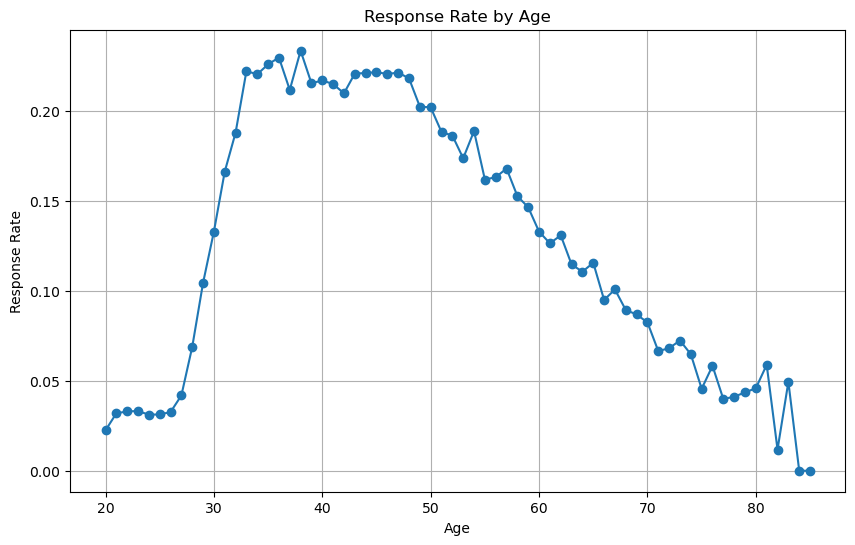

In [11]:
age_response = df.groupby('Age')['Response'].mean()

plt.figure(figsize=(10, 6))
plt.plot(age_response.index, age_response.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Response Rate')
plt.title('Response Rate by Age')
plt.grid(True)
plt.show()

데이터 스케일링, 딥러닝모델에 활용할 것까지 고려하여 min-max 스케일러 활용

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

In [13]:
scaled_df

array([[0.00000000e+00, 1.00000000e+00, 1.53846154e-02, ...,
        7.59259259e-01, 6.12456747e-01, 0.00000000e+00],
       [8.69202647e-08, 1.00000000e+00, 3.53846154e-01, ...,
        1.54320988e-01, 9.61937716e-01, 1.00000000e+00],
       [1.73840529e-07, 0.00000000e+00, 7.69230769e-02, ...,
        9.32098765e-01, 8.44290657e-01, 0.00000000e+00],
       ...,
       [9.99999826e-01, 0.00000000e+00, 1.38461538e-01, ...,
        9.32098765e-01, 6.19377163e-01, 0.00000000e+00],
       [9.99999913e-01, 0.00000000e+00, 4.76923077e-01, ...,
        1.54320988e-01, 9.13494810e-01, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 7.69230769e-02, ...,
        9.32098765e-01, 6.19377163e-01, 0.00000000e+00]])

In [14]:
df.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,5.413510e-01,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,6.031073e-01,5.026798e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,4.982872e-01,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,5.678559e-01,4.999928e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,1.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,2.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


train test split

In [15]:
from sklearn.model_selection import train_test_split

X = df[df.columns.drop(['id', 'Response'])]
scaled_X = scaler.fit_transform(X)

y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=2018015632)

Response가 0인 데이터와 1인 데이터의 비율 차이가 큼을 확인

In [16]:
data_neg = df.loc[df['Response'] == 0] #using new_df because it contains the scaled values and the loan_status column
data_pos = df.loc[df['Response'] == 1]
print(len(data_neg))
print(len(data_pos))

10089739
1415059


In [17]:
import random
import sklearn

train 데이터셋에서 한 클래스(0)이 너무 높을 경우 모델이 모든 값을 0으로 예측하는 문제가 발생할 수 있으므로 언더샘플링 방법을 통해 비율을 맞추어준다.

In [18]:
sample1_neg = data_neg.iloc[random.sample(range(0,len(data_neg)), 1000000)]
sample1_pos = data_pos.iloc[random.sample(range(0,len(data_pos)), 1000000)]
sample1 = pd.concat([sample1_neg,sample1_pos], axis = 0)
sample1=sklearn.utils.shuffle(sample1)

In [19]:
from sklearn.model_selection import train_test_split

X_train = sample1[sample1.columns.drop(['id', 'Response'])]
scaled_X = scaler.transform(X_train)

y = sample1['Response']

In [20]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


## 모델링

LightGBM을 통한 모델링

In [21]:
from sklearn.model_selection import GridSearchCV, train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

model = LGBMClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [300],
    'max_depth': [7],
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='roc_auc', n_jobs=-1, verbose=1)


grid_search.fit(scaled_X, sample1['Response'])


print("Best Parameters:", grid_search.best_params_)
print("Best Score (accuracy):", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 4 folds for each of 2 candidates, totalling 8 fits
[LightGBM] [Info] Number of positive: 1000000, number of negative: 1000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 2000000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best Score (accuracy): 0.87844724225
Accuracy: 0.7241710706255939
F1 Score: 0.45311500987200576
ROC AUC Score: 0.8123172941194959
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82   3027009
           1       0.30      0.93      0.45    424431

    accuracy                          

DNN을 이용한 모델링

In [22]:
X_train = scaled_X

In [23]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


train_dataset = MyDataset(X_train, sample1['Response'].values)
test_dataset = MyDataset(X_test, y_test.values)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class DNN(nn.Module):
    def __init__(self, input_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.gelu(self.fc1(x))
        x = F.gelu(self.fc2(x))
        x = F.gelu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

model = DNN(input_size=10)

In [25]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))  

        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader)}")

print("Training finished.")

Epoch [1/5], Loss: 0.42323219399595263
Epoch [2/5], Loss: 0.41978073753976825
Epoch [3/5], Loss: 0.41902263463926315
Epoch [4/5], Loss: 0.4184737191839218
Epoch [5/5], Loss: 0.4180939345121384
Training finished.


In [26]:
model.eval()


all_targets = []
all_predictions = []

with torch.no_grad():  
    for inputs, targets in test_loader:
        outputs = model(inputs)
        all_targets.extend(targets.numpy())
        all_predictions.extend(outputs.numpy())

all_targets = np.array(all_targets)
all_predictions = np.array(all_predictions).flatten()

# AUC 계산
auc_score = roc_auc_score(all_targets, all_predictions)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.8569


## 모델링 결과 (AUC score)

### LightGBM : 0.8123 
### DNN : 0.8569
